## classification

### import required packages

In [114]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [115]:
df = pd.read_csv("framingham.csv")
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,3.0,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0


In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [117]:
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4135.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,1.019791,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [118]:
corr = df.corr()
corr['TenYearCHD'].describe()

count    16.000000
mean      0.151783
std       0.237451
min      -0.054248
25%       0.060806
50%       0.087947
75%       0.153198
max       1.000000
Name: TenYearCHD, dtype: float64

### find the segnificant columns or featurs

In [119]:

important_features = []
for index in range(16):
    print(f"correlation between {df.columns[index]} and TenYearCHD = {corr['TenYearCHD'][index]}")
    if (abs(corr['TenYearCHD'][index]) >= 0.1) and (index != 15):
        important_features.append(df.columns[index])
important_features


correlation between male and TenYearCHD = 0.08837357241125844
correlation between age and TenYearCHD = 0.22540774458750035
correlation between education and TenYearCHD = -0.054248466596321154
correlation between currentSmoker and TenYearCHD = 0.01944849847819041
correlation between cigsPerDay and TenYearCHD = 0.057755206928342795
correlation between BPMeds and TenYearCHD = 0.08751945023873425
correlation between prevalentStroke and TenYearCHD = 0.06182262818175407
correlation between prevalentHyp and TenYearCHD = 0.1774575607489973
correlation between diabetes and TenYearCHD = 0.09734423556966126
correlation between totChol and TenYearCHD = 0.0823685438656359
correlation between sysBP and TenYearCHD = 0.216373828929235
correlation between diaBP and TenYearCHD = 0.1451115926054223
correlation between BMI and TenYearCHD = 0.07530032244325792
correlation between heartRate and TenYearCHD = 0.02290660760589982
correlation between glucose and TenYearCHD = 0.12559035521913023
correlation betw

['age', 'prevalentHyp', 'sysBP', 'diaBP', 'glucose']

In [120]:
# select only required feature
# df_new = df[important_features]
df_new = df
for column in df.columns:
    if (column not in important_features) and (column != 'TenYearCHD'):
        print(f"deleting {column}")
        del df_new[column]
df_new


deleting male
deleting education
deleting currentSmoker
deleting cigsPerDay
deleting BPMeds
deleting prevalentStroke
deleting diabetes
deleting totChol
deleting BMI
deleting heartRate


,age,prevalentHyp,sysBP,diaBP,glucose,TenYearCHD
0,39,0,106.0,70.0,77.0,0
1,46,0,121.0,81.0,76.0,0
2,48,0,127.5,80.0,70.0,0
3,61,1,150.0,95.0,103.0,1
4,46,0,130.0,84.0,85.0,0
...,...,...,...,...,...,...
4235,48,0,131.0,72.0,86.0,0
4236,44,0,126.5,87.0,NaN,0
4237,52,0,133.5,83.0,107.0,0
4238,40,1,141.0,98.0,72.0,0


In [121]:
na_values = df_new.isna().sum()
for column in important_features:
    print(f"missing values in {column} = {na_values[column]}")

    # check if the column has any missing values
    if na_values[column] > 0:
        df_new[column].fillna(df_new[column].mean(), inplace=True)
df_new.isna().sum()

df_new['TenYearCHD'].value_counts()


missing values in age = 0
missing values in prevalentHyp = 0
missing values in sysBP = 0
missing values in diaBP = 0
missing values in glucose = 388


0    3596
1     644
Name: TenYearCHD, dtype: int64

In [122]:
df_new.isna().sum()

age             0
prevalentHyp    0
sysBP           0
diaBP           0
glucose         0
TenYearCHD      0
dtype: int64

In [123]:
# replace the missing values in glucose columns
df_new['glucose'].fillna(df_new['glucose'].mean(), inplace=True)
df_new['TenYearCHD'].value_counts()

0    3596
1     644
Name: TenYearCHD, dtype: int64

<AxesSubplot:>

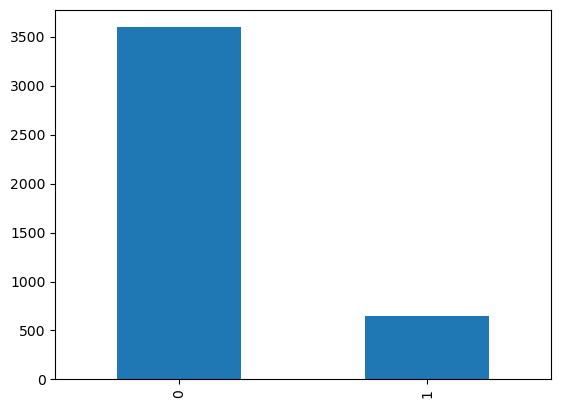

In [124]:
# check the data balance for TenYearsCHD
df_new['TenYearCHD'].value_counts().plot.bar()

In [125]:
### since the data is imbalance for dependent variable then balance it using undersampling method

df_0 = df_new[df_new['TenYearCHD'] == 0]
df_1 = df_new[df_new['TenYearCHD'] == 1]
df_under = df_0.sample(644)


In [126]:
df_final = pd.concat([df_under, df_1], axis = 0)

# data processing

In [127]:
x = df_final[important_features]
y = df_final['TenYearCHD']

In [128]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.7, random_state = 12345)

### model Building

In [129]:
import pickle
def save_model(model, name):
    with open(name, 'wb') as file:
        pickle.dump(model, file)

#### SVM

In [130]:
def build_svm_model():
    from sklearn.svm import SVC
    model = SVC(C= 2, kernel= 'rbf')
    model.fit(x_train, y_train)
    save_model(model, 'svm.pkl')
    return model    

In [131]:
def build_lg_model():
    from sklearn.linear_model import LogisticRegressionCV
    model = LogisticRegressionCV()
    model.fit(x_train, y_train)
    save_model(model, 'lg.pkl')
    return model

In [132]:
def build_knn_model():
    from sklearn.neighbors import KNeighborsClassifier
    model = KNeighborsClassifier(n_neighbors=7)
    model.fit(x_train, y_train)
    save_model(model, 'knn.pkl')
    return model

In [133]:
def build_nb_model():
    from sklearn.naive_bayes import GaussianNB
    model = GaussianNB()
    model.fit(x_train, y_train)
    save_model(model, 'nb.pkl')
    return model


In [134]:
def build_catboost_model():
    from catboost import CatBoostClassifier
    model = CatBoostClassifier(verbose=False)
    model.fit(x_train, y_train)
    save_model(model, 'cb.pkl')
    return model

In [138]:

def build_xgb_model():
    from xgboost import XGBClassifier
    model = XGBClassifier()
    model.fit(x_train, y_train)
    save_model(model, 'xgb.pkl')
    return model

### model evaluation

In [139]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_model(model, name):
    # define y_true and y_pred
    y_true = y_test
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    return accuracy, precision, recall, f1

In [142]:

model_metrics = []
model_functions = [
    {"name": "SVM", "function": build_svm_model},
    {"name": "LG", "function": build_lg_model},
    {"name": "KNN", "function": build_knn_model},
    {"name": "NB", "function": build_nb_model},
    {"name": "CatBoost", "function": build_catboost_model},
    {"name": "XGBoost", "function": build_xgb_model}
]

In [143]:

for model_info in model_functions:
    model = model_info['function']()
    accuracy, precision, recall, f1 = evaluate_model(model, 'name')
    model_metrics.append({
        "name": model_info['name'], 
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1": f1
    })

for info in model_metrics:
    print(f"{info['name']:<10}| {info['accuracy']:^5} | {info['precision']:^5} | {info['recall']:^5} | {info['f1']:^5} ")




SVM       | 0.627906976744186 | 0.6557377049180327 | 0.5970149253731343 | 0.625 
LG        | 0.6227390180878553 | 0.6470588235294118 | 0.6019900497512438 | 0.6237113402061856 
KNN       | 0.5943152454780362 | 0.627906976744186 | 0.5373134328358209 | 0.5790884718498659 
NB        | 0.5736434108527132 | 0.6551724137931034 | 0.3781094527363184 | 0.4794952681388012 
CatBoost  | 0.5788113695090439 |  0.6  | 0.5671641791044776 | 0.5831202046035805 
XGBoost   | 0.5607235142118863 | 0.582010582010582 | 0.5472636815920398 | 0.5641025641025641 
